# Método de bisección

si $f$ es continua en el intervalo [a,b] con $f(a)$ y $f(b)$ de signos diferentes, de acuerdo al teorema de el valor medio, existe un número $p$ en el intervalo (a,b) tal que $f(p)=0$.

tomando el punto medio como: $$p_1 = \dfrac{a_1 + b_1}{2}$$ si $f(p_1)=0$, entonces, $p=p_1$ de no ser así, $f(p_1)$ tiene el mismo signo que $f(a_1)$ o $f(b_1)$. 

- Si $f(p_1)$ y $f(a_1)$ tienen el mismo signo $p\in(p_1,b_1)$ y se toma $a_2 = p_1$ y $b_2=b_1$.

- Si $f(p_1)$ y $f(a_1)$ tienen signos opuestos $p\in(a_1,p_1)$ y se toma $a_2 = a_1$ y $b_2=p_1$.

este proceso se repite hasta optener la raiz deseada.


## Algoritmo

ENTRADA extremos $a$ y $b$; tolerancia $tol$; número máximo de iteraciones $n_{max}$

SALIDA solución aproximada $p$ o mensaje de error

- paso 1 $i = 1$; $f_a = f(a)$

- paso 2 mientras $i \leq n_{max}$ haga pasos 3 - 6

- paso 3 calcule $p_i$: $(a_i + b_i)/2$; $f_p = f(p_i)$

- paso 4 si $f_p = 0$ o $((a_i - b_i)/2) < tol$ entonces SALIDA($p$) PARAR (procedimiento terminado satisfactoriamente)

- paso 5 tome $i = i + 1$

- paso 6 si $f_p \cdot f_a > 0$ entonces $a = p$ si no ($f_p \cdot f_a \leq 0$), $b = p$

- paso 7 SALIDA El método fracaso después de $N$ iteraciones

In [152]:
%reset -f

In [153]:
import matplotlib.pyplot as plt
import numpy as np

In [154]:
def fun(x):
    """
    Función a la cual se le quiere calcular la raiz.

    Parameters
    ----------
    x : variable of the function

    Returns
    -------
    f : function

    """
    f = (x**3) + (5*(x**2)) - (2*x) + 7
    return f

def fun2(x):
    """
    Función a la cual se le quiere calcular la raiz.

    Parameters
    ----------
    x : variable of the function

    Returns
    -------
    f : function

    """
    f = 7 + np.sqrt(x)
    return f

Esta celda solo es para evitar lineas blancas al momento de realizar un gráfica usando un tema personalizado en vscode.

In [155]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

# Paleta de colores

Una paleta de colores personalizada

In [156]:
colors ={
    'red': '#EB1E2C',
    'orange1': '#FD6F30',
    'orange2': '#F9A729',
    'yellow': '#F9D23C',
    'green': '#5FBB68',
    'blue': '#00A5E3',
    'teal': '#64CDCC',
    'aqua': '#91DCEA',
    'purple': '#A4A4D5',
    'ligth_purple': '#BBC9E5',
}

# Inicio del algoritmo de bisección

## Primer ejemplo

In [157]:
a1 = -30
b1 = 20
tol1 = 1e-8
nmax1 = 1000

if fun(a1) * fun(b1) > 0:
    print('Error: la función en los extremos tienen el mismo signo')
else:
    print('Los extremos están bien')

Los extremos están bien


In [158]:
for i in range(nmax1):
    p1 = (a1 + b1) / 2
    ptol = (b1 - a1) / 2
    if fun(p1) == 0 or ptol < tol1:
        print('la raiz es p =', p1, 'resultado alcanzado luego de', i, 'iteraciones')
        break
    if fun(a1) * fun(p1) > 0:
        a1 = p1
    else:
        b1 = p1
    if i == nmax1 - 1:
        print('El método fracaso depués de', i, 'iteraciones. Límite de iteración máximo alcanzado.')
        break

la raiz es p = -5.582830555504188 resultado alcanzado luego de 32 iteraciones


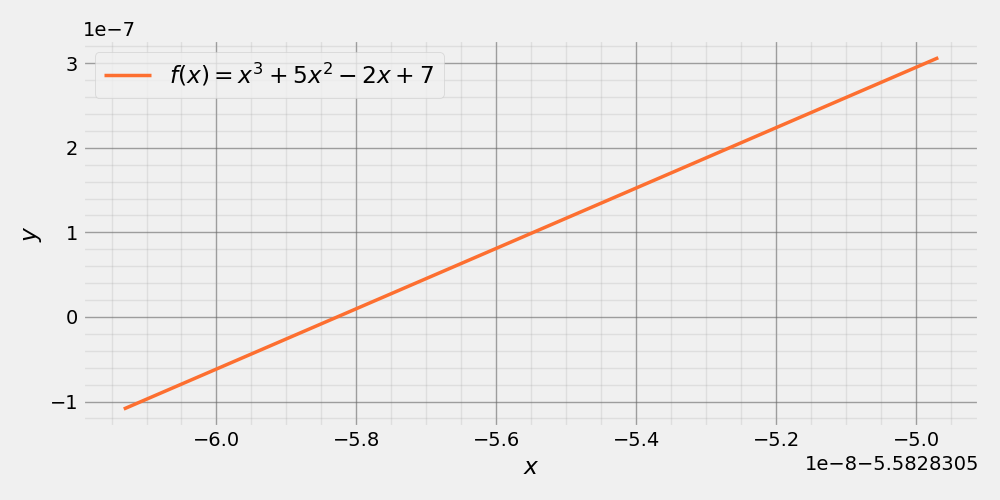

In [163]:
%matplotlib widget

plt.style.use('fivethirtyeight')

plt.figure(1, [10,5]) # [10,5] significa el tamaño de la figura [x, y]

x1 = np.linspace(a1, b1, num = 500)

plt.plot(x1, fun(x1), '-', color = colors['orange1'], linewidth = 2.5, label = '$f(x) = x^3 + 5x^2 - 2x + 7$')

plt.ylabel('$y$', fontsize = 'large')
plt.xlabel('$x$', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'large')

plt.grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)
plt.tight_layout()

# plt.savefig('ajuste_lineal_punto_1_taller_2.jpg', dpi = 1200, quality = 95)

plt.show()

## Segundo ejemplo

In [160]:
a2 = 0
b2 = 50
tol2 = 1e-5
nmax2 = 1000

if fun2(a2) * fun2(b2) > 0:
    resultado = 'Error: la función en los extremos tienen el mismo signo'
    print(resultado)
else:
    resultado = 'Los extremos están bien'
    print(resultado)

Error: la función en los extremos tienen el mismo signo


In [161]:
for i in range(nmax2):
    if resultado == 'Error: la función en los extremos tienen el mismo signo':
        print(resultado + ', método de bisección no valido.')
        break
    p2 = (a2 + b2) / 2
    ptol2 = (b2 - a2) / 2
    if fun2(p2) == 0 or ptol2 < tol2:
        print('la raiz es p =', p2, 'resultado alcanzado luego de', i, 'iteraciones')
        break
    if fun2(a2) * fun2(p2) > 0:
        a2 = p2
    else:
        b2 = p2
    if i == nmax2 - 1:
        print('El método fracaso depués de', i, 'iteraciones. Límite de iteración máximo alcanzado.')
        break

Error: la función en los extremos tienen el mismo signo, método de bisección no valido.


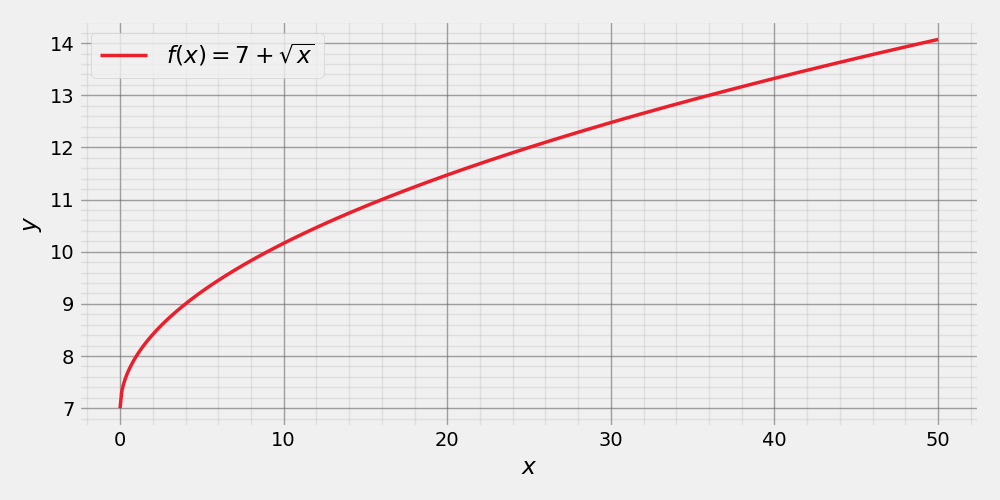

In [162]:
%matplotlib widget

plt.style.use('fivethirtyeight')

plt.figure(2, [10,5]) # [10,5] significa el tamaño de la figura [x, y]

x2 = np.linspace(a2, b2, num = 500)

plt.plot(x2, fun2(x2), '-', color = colors['red'], linewidth = 2.5, label = '$f(x) = 7 + \sqrt{x}$')

plt.ylabel('$y$', fontsize = 'large')
plt.xlabel('$x$', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'large')

plt.grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)
plt.tight_layout()

# plt.savefig('ajuste_lineal_punto_1_taller_2.jpg', dpi = 1200, quality = 95)

plt.show()